In [18]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

from sklearn.preprocessing import MinMaxScaler

In [22]:
features_data = pd.read_pickle('feature_sets/hough2_allEXChaar_1pxsize.pkl')[0]

In [7]:
# retrieving each features set column names

fos_cols = [x for x in features_data if 'img' in x and x != 'img_id']
gabor_cols = [x for x in features_data if 'gabor_'in x]
wavelet_cols = [x for x in features_data if  x[:6] == 'patch_' and x != 'patch_coordinates']
haar_cols = [x for x in features_data if  'haar' in x]
features_sets = {'fos':fos_cols, 'gabor':gabor_cols, 'wavelet':wavelet_cols,'haar': haar_cols, 
                 'fos+gabor+wavelet':fos_cols+gabor_cols+wavelet_cols,
                 'fos+gabor+wavelet+haar':fos_cols+gabor_cols+wavelet_cols+haar_cols,
                 }


In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(features_data[features_sets['gabor']].values)

In [32]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
z = tsne.fit_transform(X) 

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

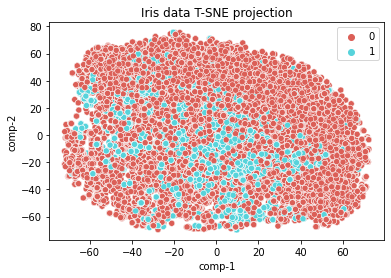

In [33]:
df = pd.DataFrame()
df["y"] = features_data.labels.values.astype(int)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection")